# Image Filtering

Goal of the lecture:

1. Understand and apply basic image filtering operations
    - Average Filtering
    - Median Filtering
    - Sobel Filtering
1. Learn how to define custom filters
1. Utilize filter operations to denoise an image

Useful links:
- Theoretical lecture
- Videos of [Computerphile](https://www.youtube.com/user/Computerphile) on the topic
    - [Mean Filtering](https://www.youtube.com/watch?v=C_zFhWdM4ic&ab_channel=Computerphile)
    - [Sobel](https://www.youtube.com/watch?v=uihBwtPIBxM&ab_channel=Computerphile)

In [25]:
# importing libraries and defining _smart_ imshow function
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import copy


def imshow(*args, **kwargs):
    # force cmap to be gray
    kwargs["cmap"] = "gray"
    # no restrictions on vmin/vmax
    # kwargs["vmin"] = 0
    # kwargs["vmax"] = 255
    plt.imshow(*args, **kwargs)
    plt.axis("off")


def get_example_arr():
    a = np.zeros((15, 15), dtype=np.float32)
    a[:, 3:6] = 0.5
    a[:, 6:9] = 1.0
    a[:, 9:12] = 0.5
    return a

## Average filtering

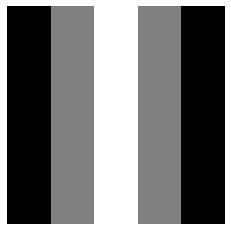

In [2]:
a = get_example_arr()
# use range [0, 1] for lab
imshow(a, vmin=0, vmax=1.0)

In [3]:
print(a)
for i in a:
    for j in i:
        print(j, end=" ")

[[0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]]
0.0 0.0 0.0 0.5 0.5 0.5 1.0 1.0 1.0 0.5 0.5 0.5 0.0 0.

In [4]:
avg_kernel = np.ones((3, 3))
avg_out = ndimage.convolve(a, avg_kernel)
print(avg_out)
for i in avg_out:
    for j in i:
        print(j, end= " ")

[[0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]
 [0.  0.  1.5 3.  4.5 6.  7.5 9.  7.5 6.  4.5 3.  1.5 0.  0. ]]
0.0 0.0 1.5 3.0 4.5 6.0 7.5 9.0 7.5 6.0 4.5 3.0 1.5 0.

Why does the following code produce the wrong output?

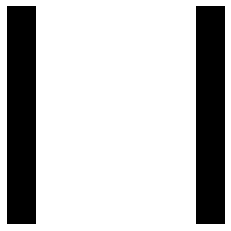

In [5]:
imshow(avg_out, vmin=0, vmax=1)

9.0
0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666667 0.0 0.0 0.0 0.0 0.16666667 0.33333334 0.5 0.6666667 0.8333333 1.0 0.8333333 0.6666667 0.5 0.33333334 0.16666

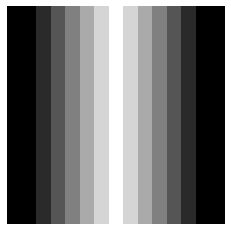

In [6]:
#Perform normalization
print(avg_kernel.sum())

norm_avg_out = avg_out / avg_kernel.sum()
for i in norm_avg_out:
    for j in i:
        print(j, end=" ")
        
imshow(norm_avg_out, vmin=0, vmax=1.0)

# watch out for implicit normalization of imshow!
# imshow(wrong_avg_out)

The average filter:
- Blurs edges
    - Softer transitions (= smoothing effect)


### In-course practice

- Try out different kernel sizes

In [48]:
# what is the effect of different kernel sizes?

(5, 5)
(-5, -5)
(2, 2)
(-2, -2)
(2, -2)
5 5
-5 -5
2 2
-2 -2
2 -2


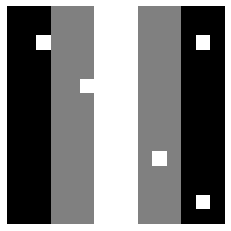

In [7]:
noisy_a = get_example_arr()

for i in [(5, 5), (-5, -5), (2, 2), (-2, -2), (2, -2)]:
    print(i)


for n_x, n_y in [(5, 5), (-5, -5), (2, 2), (-2, -2), (2, -2)]:
    print(n_x, n_y) #So we create a 2D array
    noisy_a[n_x, n_y] = 1.0 #So we change the value to 1 in the location we provided above


imshow(noisy_a)

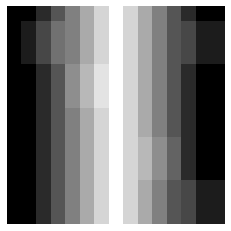

In [8]:
avg_kernel = np.ones((3, 3))
avg_out = ndimage.convolve(noisy_a, avg_kernel) / avg_kernel.sum()
imshow(avg_out, vmin=0, vmax=1)

## Median Filtering

- Non-linear digital filtering technique
- Reduces noise while preserves edges
    - What other technique could be used to filter out noise without blurring the edges?
- Effective for "salt-and-pepper noise"
    - Sparsely occuring white and black pixels (defective pixels)

In [9]:
inp = np.zeros((3, 3))
inp[-1, -1] = inp[0, 0] = 1
inp

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [10]:
inp_flatten = inp.flatten()
inp_flatten

array([1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [11]:
inp_sorted = np.sort(inp_flatten)
inp_sorted

array([0., 0., 0., 0., 0., 0., 0., 1., 1.])

In [13]:
idx = (inp_sorted.size - 1) // 2
idx

4

In [14]:
inp_sorted[idx]

0.0

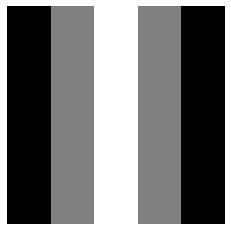

In [15]:
imshow(
    ndimage.median_filter(noisy_a, size=(3, 3)),
    vmin=0,
    vmax=1,
)

### In-course practice

Manually add noise with the maximum value to the input image that cannot be _filtered_ by the `3 x 3` median filter

In [49]:
# How can one achieve that?

[[0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]]
[[0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  

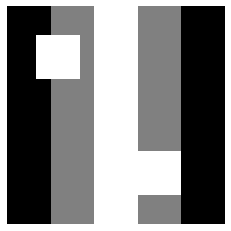

In [40]:
noise_img = np.copy(a)
print(noise_img)

for n_x, n_y in[(2,2), (-5,-6)]:
    noise_img[n_x : n_x + 3, n_y : n_y + 3] = 1.0

print(noise_img)
imshow(noise_img)
    


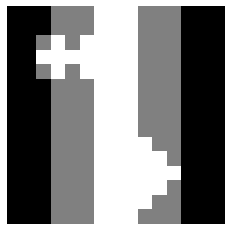

In [42]:
fil_img = ndimage.median_filter(noise_img, size=(3,3))
imshow(fil_img, vmin=0.0, vmax=1.0)

## Sobel

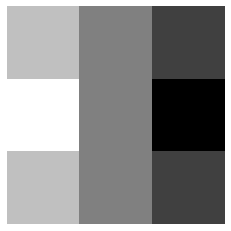

In [45]:
a = get_example_arr()

# note that the contents sum to 0
# Preserving center pixels with 2
# Prewitt would only have ones
sobel_x = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1],
    ]
)

imshow(sobel_x)

In [51]:
print(a)
sobel_x_a = ndimage.convolve(a, weights=sobel_x)
print(sobel_x_a)

[[0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ]]
[[ 0.  0.  2.  2.  0.  2.  2.  0. -2. -2.  0. -2. -2. 

- Why are some values negative?
    - What does that mean?

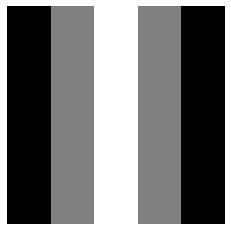

In [52]:
imshow(a, vmin=0, vmax=1)

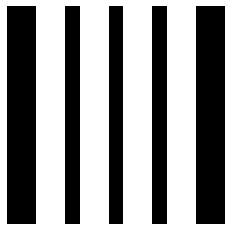

In [53]:
# utilize implicit normalization
imshow(np.absolute(sobel_x_a))

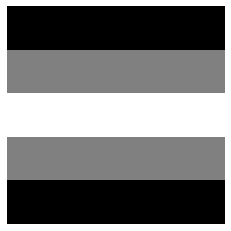

In [49]:
horz_a = get_example_arr().T
imshow(horz_a)

What would the output of the sobel-x operation look like?

### In-course practice

Define a Sobel-Y filter and apply it to `horz_a`.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


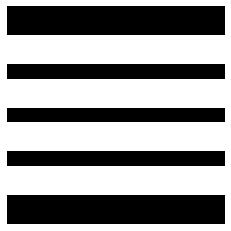

In [59]:
sobel_y = np.array(
    [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1],
    ]
)

imshow(sobel_y)
sobel_y_a = ndimage.convolve(horz_a, weights=sobel_y)
print(sobel_y_a)

imshow(np.absolute(sobel_y_a), vmin=0, vmax=1.0)

Afterwards, try to construct a "diagonal" edge-detection filter.

[[ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5  0.  -1.5 -1.5  0.
   0. ]
 [ 0.   0.   1.5  1.5  0.   1.5  1.5  0.  -1.5 -1.5 

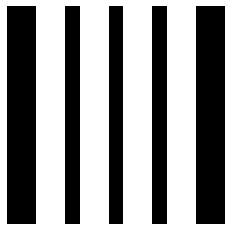

In [62]:
a = get_example_arr()

edge_filter = np.array(
    [
        [2,1,0],
        [1,0,-1],
        [0,-1,-2]
    ]

)
sobel_edge = ndimage.convolve(a, weights=edge_filter)
print(sobel_edge)
imshow(np.absolute(sobel_edge), vmin=0, vmax=1.0)